<h1 align="center">Bank Credit Card Launch: Phase 1</h1>

### Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AtliQo bank credit card

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_cust = pd.read_csv('datasets/customers.csv')
df_cs = pd.read_csv('datasets/credit_profiles.csv')
df_trans = pd.read_csv('datasets/transactions.csv')

In [3]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [4]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [5]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [6]:
df_cust[df_cust["annual_income"].isnull() == True].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [7]:
# median_df_cust_annual_income = df_cust["annual_income"].median()
# median_df_cust_annual_income
#first intake- however with different offupations we should use different medians for each occ

In [8]:
median_by_occupation = df_cust.groupby("occupation")["annual_income"].median()
median_by_occupation

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [9]:
def get_median_val(row):
    if pd.isnull(row["annual_income"]):
        return median_by_occupation[row["occupation"]]
    else:
        return row["annual_income"]

In [10]:
#quick testing
get_median_val({"occupation": "Artist", "annual_income": None})

45794.0

In [11]:
#applying the function to cover null values based on occupation

df_cust["annual_income"] = df_cust.apply(get_median_val, axis=1)

In [12]:
df_cust["annual_income"].isnull().sum()

0

In [13]:
# df_cust["annual_income"] = df_cust.apply(
#     lambda row: median_by_occupation[row["occupation"]] if pd.isnull(row["annual_income"]) else row["annual_income"],
#         axis=1)

Text(0.5, 1.0, 'Histogram of annual_income')

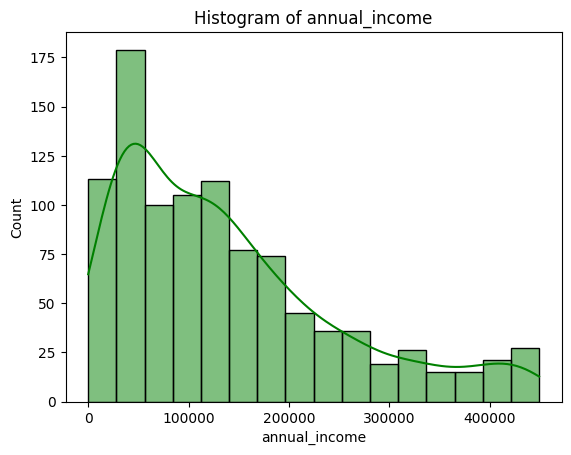

In [14]:
sns.histplot(df_cust["annual_income"], kde=True, color='green', label='Data')
plt.title("Histogram of annual_income")

In [15]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [16]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


## Treating Outliers

In [17]:
df_cust.describe()
#sanity check

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [18]:
df_cust[df_cust["annual_income"]< 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [19]:
median_by_occupation

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [21]:
for index, row in df_cust.iterrows():
    if row["annual_income"] < 100:
        df_cust.at[index, "annual_income"] = median_by_occupation[row["occupation"]]

In [23]:
df_cust[df_cust["annual_income"]< 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [26]:
df_cust.loc[[31, 316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


In [28]:
avg_income_by_occupation = round(df_cust.groupby("occupation")["annual_income"].mean(),2)
avg_income_by_occupation

occupation
Accountant              64123.56
Artist                  45309.24
Business Owner         268447.37
Consultant              60703.15
Data Scientist         137021.27
Freelancer              76327.51
Fullstack Developer     78727.97
Name: annual_income, dtype: float64

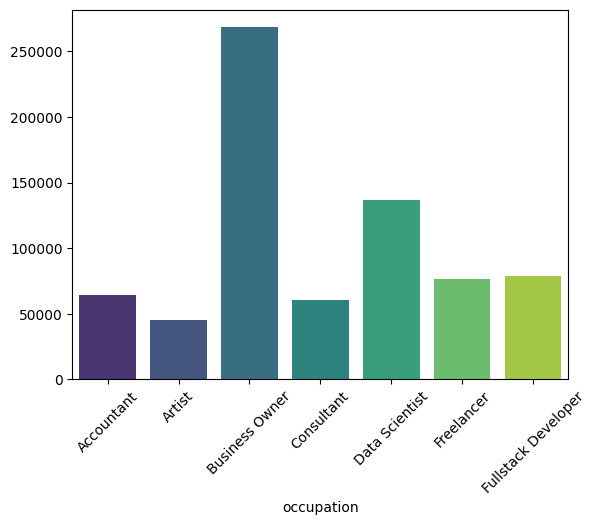

In [33]:
sns.barplot(x=avg_income_by_occupation.index , y=avg_income_by_occupation.values, palette="viridis")
plt.xticks(rotation=45)
plt.show()

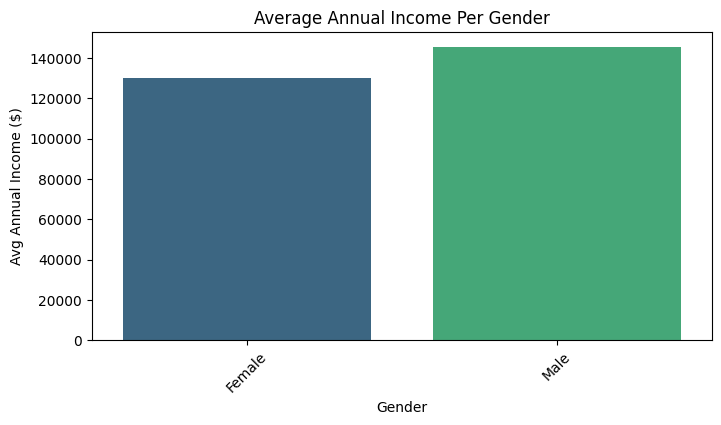

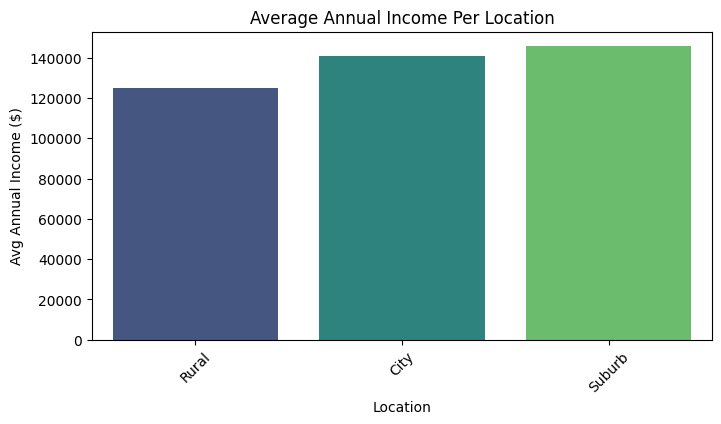

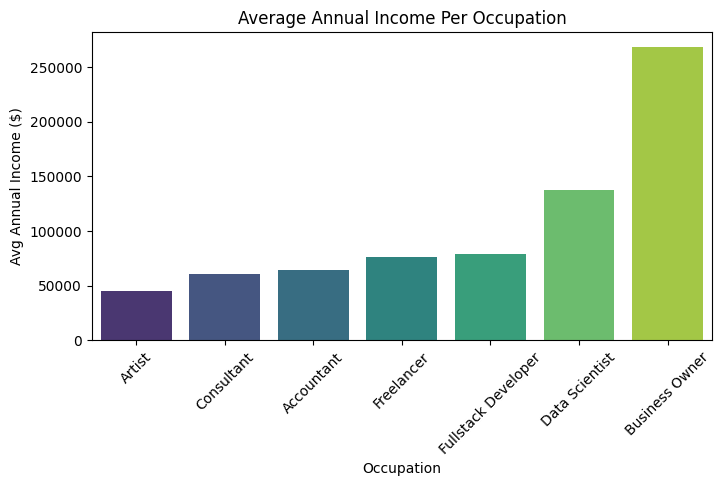

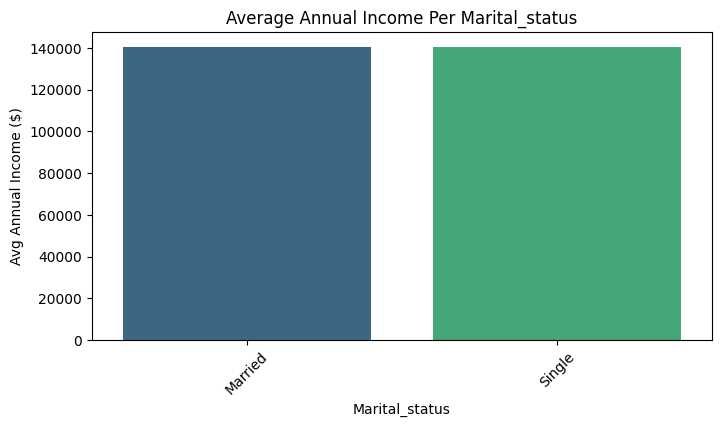

In [36]:
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

for col in categorical_columns:
    plt.figure(figsize=(8,4))
    avg_income_per_group = df_cust.groupby(col)["annual_income"].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f"Average Annual Income Per {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Avg Annual Income ($)")
    plt.show()

In [ ]:
df_cust[(df_cust["age"] < 15) | (df_cust["age"] > 80)]
#age outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [42]:
df_cust["age"].isnull().sum()

0

In [38]:
df_cust = df_cust[(df_cust["age"] >= 15) & (df_cust["age"] <= 80)]

<Axes: xlabel='age', ylabel='Count'>

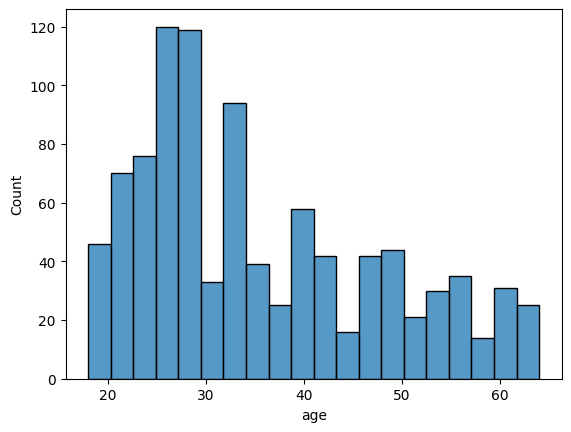

In [43]:
sns.histplot(df_cust["age"], bins=20, edgecolor="black")

In [44]:
df_cust["age"].describe()

count    980.000000
mean      35.577551
std       12.305571
min       18.000000
25%       26.000000
50%       32.000000
75%       44.000000
max       64.000000
Name: age, dtype: float64

In [46]:
categories = [17,25,48,65]
labels = ['18-25', '26-48', '49-65']
df_cust["age_group"] = pd.cut(df_cust["age"], bins=categories, labels=labels)
df_cust.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25


In [52]:
age_group_counts = round(df_cust["age_group"].value_counts(normalize=True)*100,2)
age_group_counts

age_group
26-48    56.84
18-25    24.49
49-65    18.67
Name: proportion, dtype: float64

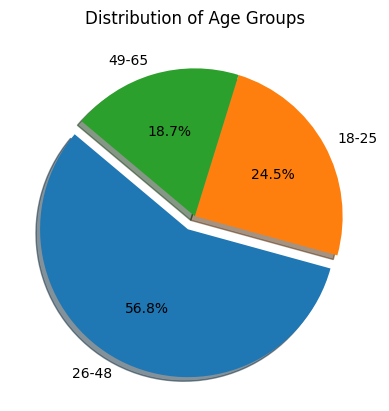

In [59]:
plt.pie(age_group_counts, labels=age_group_counts.index, autopct="%1.1f%%", shadow=True,
        explode=(0.1,0,0),
        startangle=140)
plt.title("Distribution of Age Groups")
plt.show()

In [60]:
df_cust.location.value_counts()

location
City      666
Suburb    231
Rural      83
Name: count, dtype: int64

In [61]:
df_cust.gender.value_counts()

gender
Male      660
Female    320
Name: count, dtype: int64

In [65]:
customer_location_gender = df_cust.groupby(["location", "gender"]).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,220,446
Rural,26,57
Suburb,74,157


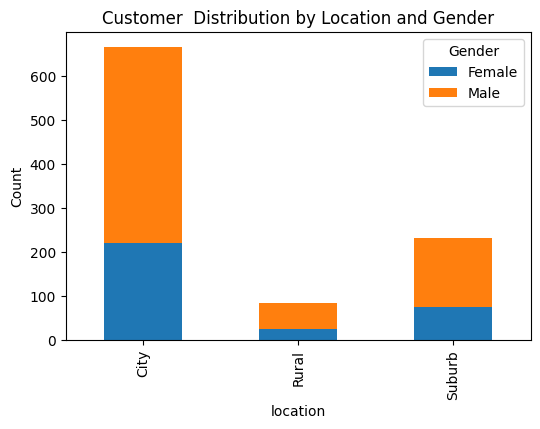

In [72]:
customer_location_gender.plot(kind="bar", stacked=True, figsize=(6,4))
plt.ylabel("Count")
plt.title("Customer  Distribution by Location and Gender")
plt.legend(title="Gender")
plt.show()